In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
eurostat_shr_renewable_filepath = '/content/drive/MyDrive/Masters/Experiment Design and Execution/Exercise 2/eurostat_share_of_renewables.xlsx'

### Defining Helper Functions to Read and Clean the Data

In [4]:
def read_file(filepath, sheetname):
  return pd.read_excel(filepath, sheet_name=sheetname, skiprows= 8, engine='openpyxl')

In [5]:
def clean_data(df):
  # ======Cleaning column names================
  df = df.rename(columns={'TIME': 'Country'})
  df = df[df['Country'] != 'GEO (Labels)']

  valid_cols = [col for col in df.columns if not col.startswith('Unnamed:')]
  df_clean = df[valid_cols]

  # Transforming to "Long Format" for plotting
  df_long = df_clean.melt(id_vars=['Country'], var_name='Year', value_name='Share')

  # Converting values to numeric (handling ':' as NaN)
  df_long['Share'] = pd.to_numeric(df_long['Share'], errors='coerce')
  df_long['Year'] = pd.to_numeric(df_long['Year'])

  #Removing Kosovo and additional details from df
  df_long = df_long[(df_long['Country'] != 'Kosovo*') & (df_long['Country'] != 'Special value') & (df_long['Country'] != ':')]

  return df_long

### Reading Data from the Eurostat Share of Renewable Energy Consumption Dataset

### Dataset Description
The Eurostat share of renewable energy dataset reports the proportion of energy from renewable sources in gross final energy consumption across EU Member States and selected European countries. It is the official monitoring dataset used by the European Commission to track progress toward EU renewable energy targets.

The dataset covers annual data from the early 2000s onward and is disaggregated by sector, including electricity, heating and cooling, and transport, as well as the overall renewable share. Renewable sources include wind, solar, hydro, biomass, geothermal, and renewable waste.

In [37]:
total_share_df = read_file(eurostat_shr_renewable_filepath, 'Sheet 1')

#print(total_share_df.head())

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [7]:
total_share_df = clean_data(total_share_df)
print(total_share_df.head())

                                     Country  Year   Share
0  European Union - 27 countries (from 2020)  2004   9.605
1                                    Belgium  2004   1.916
2                                   Bulgaria  2004   9.231
3                                    Czechia  2004   6.773
4                                    Denmark  2004  14.839


### Plotting Trend of Renewable Energy in Gross Final Energy Consumption for Selected Countries

In [8]:
selected_countries = [
    'European Union - 27 countries (from 2020)', 'Belgium', 'Denmark', 'Germany', 'Greece', 'Iceland', 'Norway'
    'Sweden', 'France', 'Spain', 'Italy', 'Netherlands', 'Austria'

]

In [9]:
# Selecting certain countries from all european countries

df_selected = total_share_df[total_share_df['Country'].isin(selected_countries)]

In [10]:
fig = px.line(
    df_selected,
    x="Year",
    y="Share",
    color="Country",
    markers=True,
    title="Share of Renewable Energy in Gross Final Energy Consumption (%)",
    labels={
        "Share": "Renewable Share (%)",
        "Year": "Year"
    }
)
fig.update_traces(
    hovertemplate=
        "<b>%{fullData.name}</b><br>" +
        "Renewable share: %{y:.1f}%<extra></extra>"
)

fig.update_layout(
    hovermode="x",
    legend_title_text="Country"
)

fig.update_traces(
    line=dict(width=2),
    opacity=1,
    selector=dict(mode="lines+markers")
)

fig.update_traces(
    hoverinfo="skip"
)

# Highlight active trace
#fig.update_traces(
   # opacity=1,
 #   selector=lambda t: t.hoveron == "points"
#)



**European Union - 27** : This value is a calculated weighted average across EU Member States, reflecting each country’s contribution to total EU energy consumption rather than a simple country mean. As such, it represents the system-wide benchmark against which national performances are assessed.


The EU-27 aggregate exhibits a clear upward trajectory, rising from around 60% in the mid-2000s to nearly 80% by 2024. Growth accelerates notably after 2015, coinciding with the adoption of the Paris Agreement, although the trend appears to flatten slightly after 2021, suggesting that further gains may require stronger policy measures or technological breakthroughs.

### Analysis of Different Countries:

*   Iceland stands out as a clear leader throughout the period, consistently maintaining renewable shares above 70%
*   Denmark and Austria show strong and sustained growth, surpassing 40% renewable share by the early 2020s

*   Germany, Spain, France, and Italy follow a more gradual but steady upward path, converging toward the 20–25% range by 2024.
*   Belgium and the Netherlands remain at the lower end of the distribution, despite noticeable post-2015 increases, highlighting persistent structural or policy constraints.



/tmp/ipython-input-1981566836.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-1981566836.py:10: UserWarning:

The palette list has more values (38) than needed (37), which may not be intended.



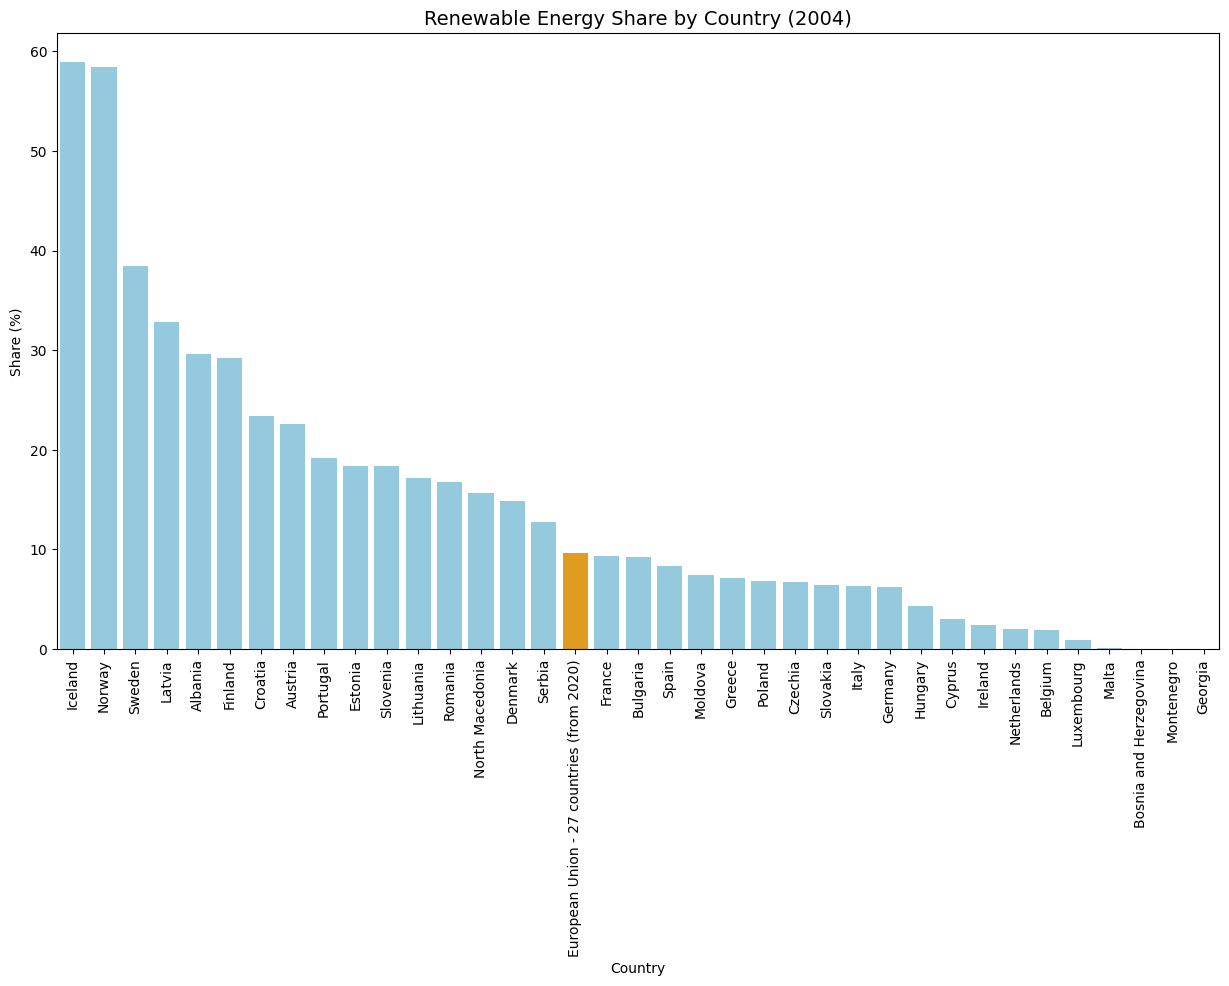

In [12]:
#============Plotting Renewable Energy Share - Overall by country for 2004============
df_2004 = total_share_df[total_share_df['Year'] == 2004].sort_values('Share', ascending=False)
eu_label = 'European Union - 27 countries (from 2020)'

colors = [
    'orange' if eu_label in str(x) else 'skyblue'
    for x in df_2004['Country']
]
plt.figure(figsize=(15, 8))
sns.barplot(data=df_2004, x='Country', y='Share', palette=colors)

plt.xticks(rotation=90) # Rotates country names for readability
plt.title('Renewable Energy Share by Country (2004)', fontsize=14)
plt.ylabel('Share (%)')
plt.show()

Note: The countries with missing bars in the above visualisation represent missing data as opposed to 0% renewable share

### Analysis for 2004:



* The EU average renewable energy share was below 10%, highlighting that renewables were still marginal at the European system level.

*   A small group of countries—mainly Nordic states—exhibited very high renewable shares, driven largely by long-standing hydropower and biomass capacity rather than recent policy action.

*  Most EU Member States clustered at or below the EU average, indicating limited penetration of renewables across electricity, transport, and heating sectors



/tmp/ipython-input-539952750.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-539952750.py:10: UserWarning:

The palette list has more values (38) than needed (37), which may not be intended.



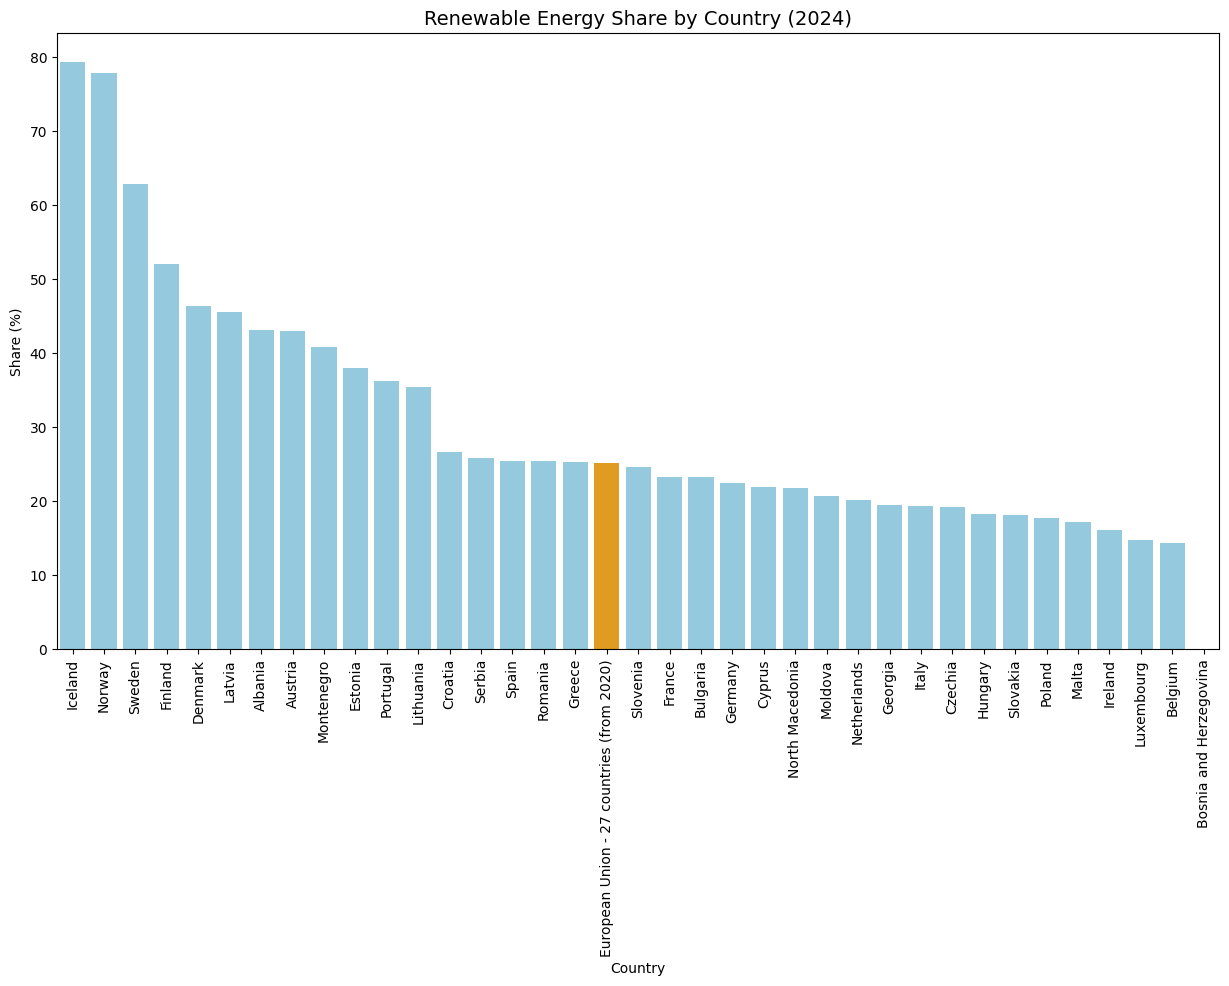

In [11]:
#============Plotting Renewable Energy Share - Overall by country for 2024============
df_2024 = total_share_df[total_share_df['Year'] == 2024].sort_values('Share', ascending=False)
eu_label = 'European Union - 27 countries (from 2020)'

colors = [
    'orange' if eu_label in str(x) else 'skyblue'
    for x in df_2024['Country']
]
plt.figure(figsize=(15, 8))
sns.barplot(data=df_2024, x='Country', y='Share', palette=colors)

plt.xticks(rotation=90) # Rotates country names for readability
plt.title('Renewable Energy Share by Country (2024)', fontsize=14)
plt.ylabel('Share (%)')
plt.show()

Note: The countries with missing bars in the above visualisation represent missing data as opposed to 0% renewable share

### Analysis for 2024:


*  The EU average renewable share has increased substantially, indicating that renewables have become a central component of Europe’s energy system rather than a niche addition.
*   Iceland, Norway and Sweden remain at the forefront in the renewable energy race, while countries like Denmark and Finland have shown substantial improvements.




### Plotting Trend in Different Sectors (Transport, Electricity, Heating & Cooling)

In [13]:
#===============For different sectors=============
df_transport_renewable = read_file(eurostat_shr_renewable_filepath, 'Sheet 2')
df_electricity_renewable = read_file(eurostat_shr_renewable_filepath, 'Sheet 3')
df_heating_renewable = read_file(eurostat_shr_renewable_filepath, 'Sheet 4')

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [14]:
df_transport_renewable_cleaned = clean_data(df_transport_renewable)
df_electricity_renewable_cleaned = clean_data(df_electricity_renewable)
df_heating_renewable_cleaned = clean_data(df_heating_renewable)

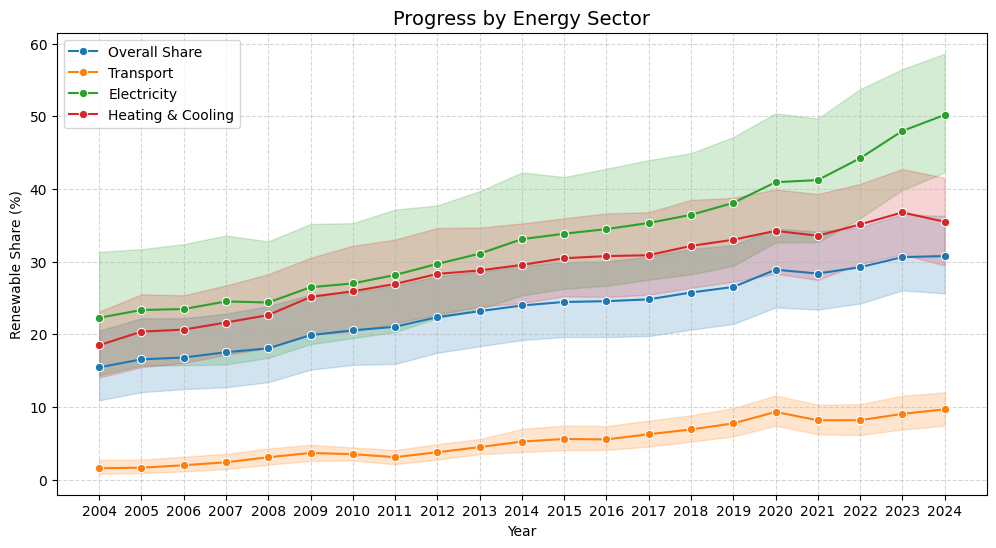

In [15]:
# Sectoral Comparison (EU-27)
plt.figure(figsize=(12, 6))

labels = ['Overall Share', 'Transport', 'Electricity', 'Heating & Cooling']
dfs = [total_share_df, df_transport_renewable_cleaned, df_electricity_renewable_cleaned, df_heating_renewable_cleaned]

for df, label in zip(dfs, labels):
    sns.lineplot(data= df, x='Year', y='Share', marker='o', label = label)

plt.title('Progress by Energy Sector', fontsize=14)
plt.xticks(total_share_df['Year'].unique())
plt.ylabel('Renewable Share (%)')
plt.grid(True, linestyle='--', alpha=0.5)

An interesting observation in the plot is that the overall renewable energy share is less than that of Electricity and Heating/Cooling. Upon deep dive into the metadata of the dataset it was discovered that
the overall renewable energy share is a weighted average of sectoral performance, where each sector's contribution is proportional to its total energy consumption. While Electricity shows the highest progress (reaching 50% in the EU-27), it represents a smaller portion of total energy demand than Heating & Cooling and Transport. These two sectors remain structurally difficult to decarbonize, relying stubbornly on fossil fuels for building heat and liquid fuels for heavy transport. Consequently, the Overall Share sits lower than the electricity peak because it must account for the massive, fossil-heavy energy footprint of our heating systems and vehicles.

### Key Takeaways for Policy Makers:
While Renewable Electricity is a major success story (reaching ~ 45.4% in the EU-27), the Overall Renewable Share remains significantly lower (~24.6%) because it is anchored by the massive energy demands of Heating and Transport. These two sectors represent the largest portions of total energy consumption but remain stubbornly reliant on fossil fuels. To meet 2030 targets, policy must shift focus from "green electricity" to sector coupling—using that clean power to heat buildings via heat pumps and fuel vehicles via EVs. Success should be measured by the displacement of fossil fuels across the entire energy system.

## Comparison with Fossil Fuels

For this the dataset utilised is the Eurostat Complete Energy Balances. It provides a comprehensive and harmonized overview of energy flows within European countries, covering energy supply, transformation, and final consumption by fuel type and sector. It tracks how energy is produced, imported, transformed (e.g. in power plants), and ultimately consumed by sectors such as industry, transport, households, and services.

In [16]:
eurostat_energy_balance_filepath = '/content/drive/MyDrive/Masters/Experiment Design and Execution/Exercise 2/eurostat_complete_energy_balance.xlsx'

In [17]:
total_energy_balance_df = pd.read_excel(eurostat_energy_balance_filepath, sheet_name= 'Sheet 31', skiprows= 9, engine='openpyxl')
total_energy_balance_df = clean_data(total_energy_balance_df)
total_energy_balance_df = total_energy_balance_df.rename(columns={'Share': 'Total Consumption (Terajoule)'})

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



### NOTE:
Data for countries outside the EU is missing for the year 2024.

In [18]:
total_available_energy_df = pd.read_excel(eurostat_energy_balance_filepath, sheet_name= 'Sheet 46', skiprows= 9, engine='openpyxl')
total_available_energy_df = clean_data(total_available_energy_df)
total_available_energy_df = total_available_energy_df.rename(columns={'Share': 'Total Available for Consumption (Terajoule)'})
total_available_energy_df = total_available_energy_df.dropna(subset=["Country"])
print(total_available_energy_df)

                                       Country  Year  \
0    European Union - 27 countries (from 2020)  2004   
1                                      Belgium  2004   
2                                     Bulgaria  2004   
3                                      Czechia  2004   
4                                      Denmark  2004   
..                                         ...   ...   
915                                    Georgia  2024   
916                                    Albania  2024   
917                                     Serbia  2024   
918                                    Türkiye  2024   
919                                    Ukraine  2024   

     Total Available for Consumption (Terajoule)  
0                                   4.535787e+07  
1                                   1.763510e+06  
2                                   4.180201e+05  
3                                   1.184086e+06  
4                                   6.222633e+05  
..                   

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [19]:
# For comparing renewable energy share with fossil fuels extract all the data and combine into a single df

fossil_fuels_data = []
for i in range(1, 5):
  df = pd.read_excel(eurostat_energy_balance_filepath, sheet_name= f'Sheet {46+i}', skiprows= 9, engine='openpyxl')
  df = clean_data(df)
  df = df.dropna(subset=["Country"])
  df = df.rename(columns={'Share': 'Total Available for Consumption (Terajoule)'})
  fossil_fuels_data.append(df)

combined_fossil_fuels = pd.concat(fossil_fuels_data)
combined_fossil_fuels = (
    combined_fossil_fuels.groupby(["Country", "Year"],as_index=False)["Total Available for Consumption (Terajoule)"].sum()
)

#print(combined_fossil_fuels)


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [20]:
renewable_data = []
for i in range(8):
  df = pd.read_excel(eurostat_energy_balance_filepath, sheet_name= f'Sheet {52+i}', skiprows= 9, engine='openpyxl')
  df = clean_data(df)
  df = df.dropna(subset=["Country"])
  df = df.rename(columns={'Share': 'Total Available for Consumption (Terajoule)'})
  renewable_data.append(df)

combined_renewable = pd.concat(renewable_data)
combined_renewable = (
    combined_renewable.groupby(["Country", "Year"],as_index=False)["Total Available for Consumption (Terajoule)"].sum()
)


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workb

In [21]:
#Merge into a single dataframe for easy access and comparison

#First aligning the three dataframes
combined_fossil_fuels = combined_fossil_fuels.rename(
    columns={"Total Available for Consumption (Terajoule)": "fossil"}
)

combined_renewable = combined_renewable.rename(
    columns={"Total Available for Consumption (Terajoule)": "renewable"}
)

total_available_energy_df = total_available_energy_df.rename(
    columns={"Total Available for Consumption (Terajoule)": "total"}
)

In [22]:
df_compare = (
    total_available_energy_df
    .merge(combined_fossil_fuels, on=["Country", "Year"], how="left")
    .merge(combined_renewable, on=["Country", "Year"], how="left")
)
print(df_compare)

                                       Country  Year         total  \
0    European Union - 27 countries (from 2020)  2004  4.535787e+07   
1                                      Belgium  2004  1.763510e+06   
2                                     Bulgaria  2004  4.180201e+05   
3                                      Czechia  2004  1.184086e+06   
4                                      Denmark  2004  6.222633e+05   
..                                         ...   ...           ...   
835                                    Georgia  2024           NaN   
836                                    Albania  2024           NaN   
837                                     Serbia  2024           NaN   
838                                    Türkiye  2024           NaN   
839                                    Ukraine  2024           NaN   

           fossil    renewable  
0    3.172844e+07  5096990.679  
1    1.393154e+06    52167.370  
2    2.564922e+05    59774.960  
3    7.882993e+05   134565.

Text(0.5, 1.0, 'EU Energy Consumption: Renewable vs Fossil')

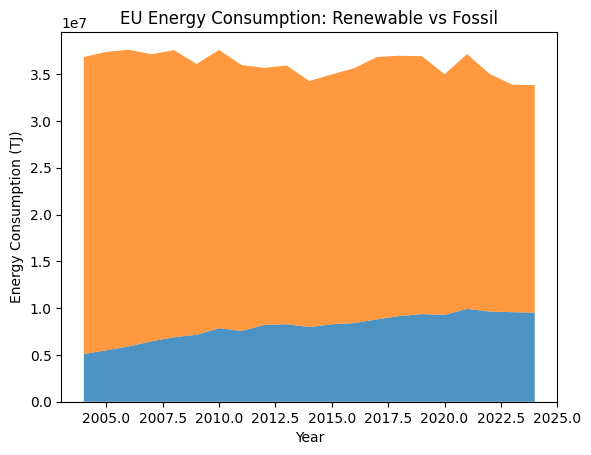

In [23]:
#Plotting stacked graph to compare composition of total energy over time
df_plot = (
    df_compare[df_compare["Country"] == "European Union - 27 countries (from 2020)"]
    .sort_values("Year")
)

plt.stackplot(df_plot['Year'].values, df_plot['renewable'].values, df_plot['fossil'].values, labels=["Renewable", "Fossil"], alpha=0.8)
plt.xlabel("Year")
plt.ylabel("Energy Consumption (TJ)")
plt.title("EU Energy Consumption: Renewable vs Fossil")


This chart shows a clear increase in renewable energy consumption over time, indicating steady progress in expanding clean energy sources. However, fossil fuels continue to account for the largest share of total energy use and do not show a strong or sustained decline. As a result, much of the growth in renewables appears to be supplementing overall energy demand rather than fully replacing fossil energy. While this trend reflects positive momentum toward a cleaner energy mix, it also highlights that a decisive reduction in fossil fuel consumption will be necessary to align more closely with long-term climate goals.

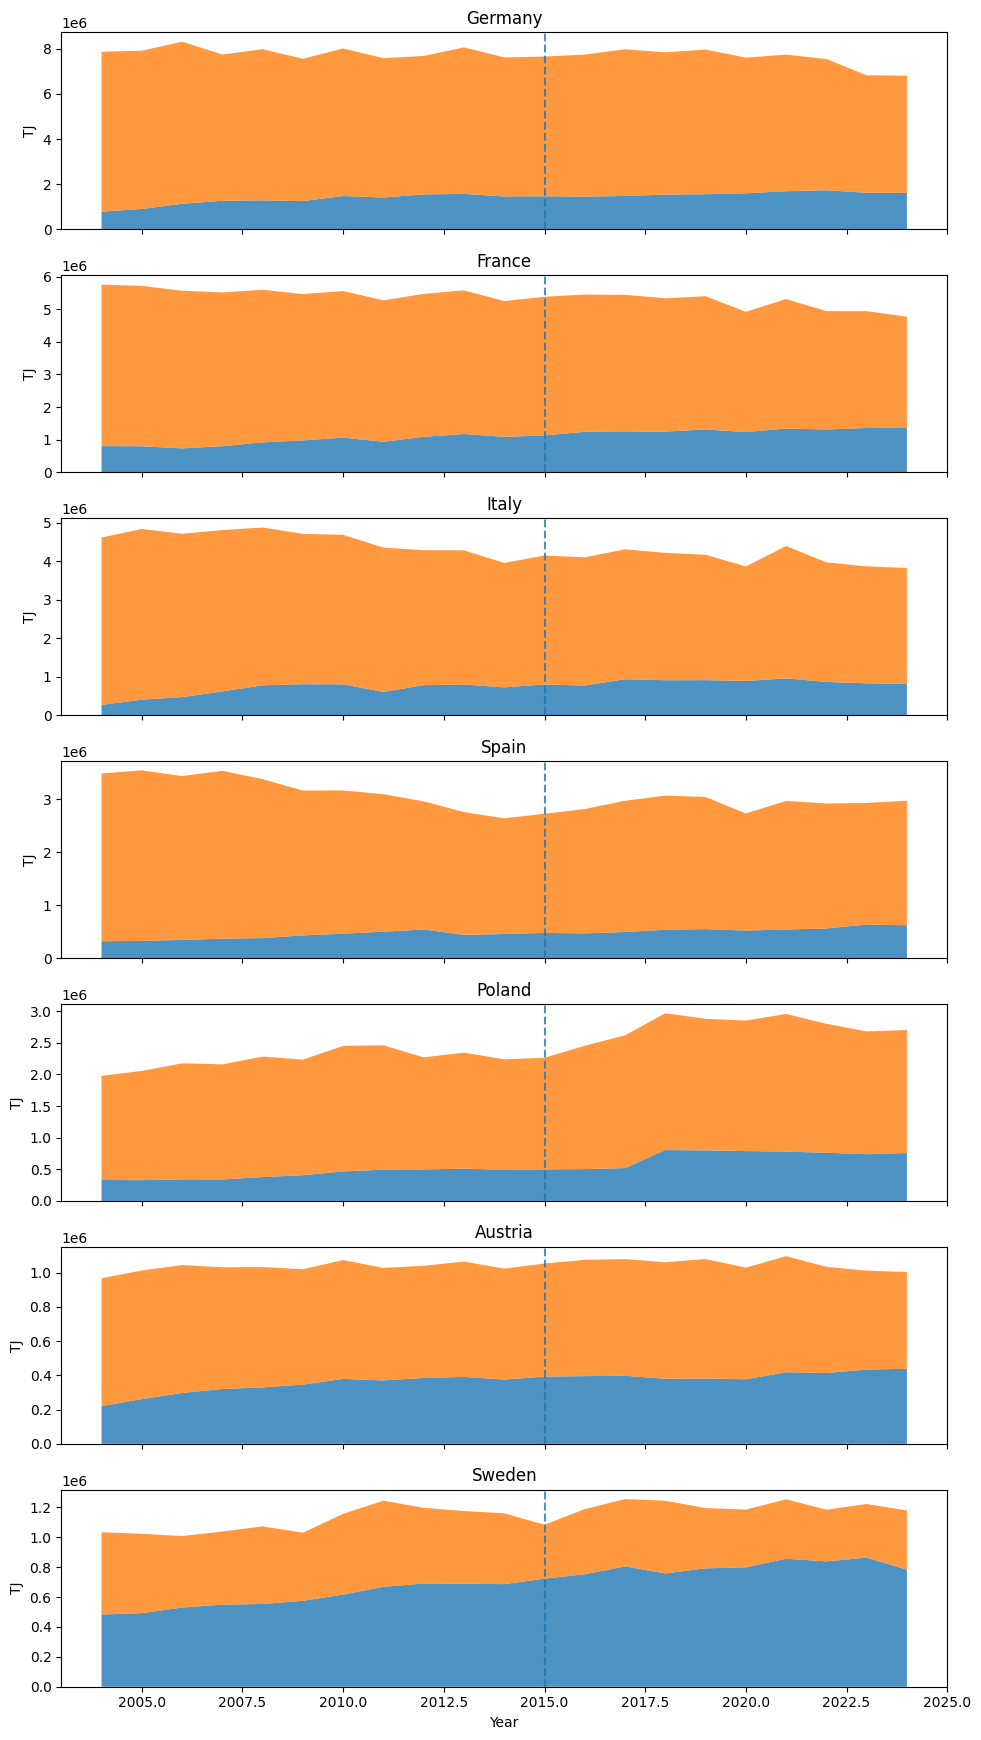

In [24]:
countries = [
    "Germany", "France", "Italy", "Spain", "Poland", "Austria", "Sweden"
]
fig, axes = plt.subplots(len(countries), 1, figsize=(10, 2.5 * len(countries)), sharex=True)

for ax, country in zip(axes, countries):
    df_c = (
        df_compare[df_compare["Country"] == country]
        .sort_values("Year")
    )

    ax.stackplot(
        df_c["Year"],
        df_c["renewable"],
        df_c["fossil"],
        alpha=0.8
    )

    ax.axvline(
        2015,
        linestyle="--",
        linewidth=1.5,
        alpha=0.8
    )
    ax.set_title(country)
    ax.set_ylabel("TJ")

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()



### Predicting if countries are On-Track for the Paris Agreement especially EU's 2030 target of 42.5% renewable share

After 2015, the increase in renewable energy share becomes more pronounced and appears to accelerate over time. To reflect this behavior, a second-degree polynomial was used instead of a linear trend.      

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [36]:
target_2030 = 42.5
results = []

# Get a unique list of countries
countries = total_share_df['Country'].unique()

for country in countries:
    data = total_share_df[total_share_df['Country'] == country].sort_values('Year').dropna()

    data = data.dropna(subset=["Country"])
    if len(data) < 10:
        continue

    # Train-Test split with train data <= 2020 and test data > 2020
    train = data[data['Year'] <= 2020]
    test = data[data['Year'] > 2020]

    X_train, y_train = train[['Year']].values, train['Share'].values
    X_test, y_test = test[['Year']].values, test['Share'].values

    # Training a polynomial model
    poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()).fit(X_train, y_train)
    poly_pred = poly_model.predict(X_test)

    poly_rmse = np.sqrt(mean_squared_error(y_test, poly_pred))

    # PREDICTING THE FUTURE (2030)
    # Re-train the best model on the FULL dataset for the final forecast
    X_full, y_full = data[['Year']].values, data['Share'].values
    final_model = poly_model.fit(X_full, y_full)

    pred_2030 = final_model.predict([[2030]])[0]

    # Calculate Standard Error of the Residuals
    y_pred = final_model.predict(X_full)
    residuals = y_full - y_pred
    std_error = np.std(residuals)
    # 95% CI is approx +/- 1.96 standard deviations
    margin_of_error = 1.96 * std_error

    # Store the results
    results.append({
        'Country': country,
        'Accuracy_Error(RMSE)': round(poly_rmse , 2),
        'Current_Share': y_full[-1],
        'Forecast_2030_Base': round(pred_2030, 1),
        'Forecast_2030_Low': round(pred_2030 - margin_of_error, 1),
        'Forecast_2030_High': round(pred_2030 + margin_of_error, 1),
        'On_Track': 'Yes' if pred_2030 >= target_2030 else 'No'
    })

# Converting to DataFrame
final_report = pd.DataFrame(results)
#print(final_report.sort_values('Forecast_2030_Base', ascending=False))

In [27]:
final_report_sorted = final_report.sort_values(
    'Forecast_2030_Base', ascending=False
)

final_report_sorted

,Country,Accuracy_Error(RMSE),Current_Share,Forecast_2030_Base,Forecast_2030_Low,Forecast_2030_High,On_Track
29,Norway,3.58,77.932,86.4,84.3,88.6,Yes
28,Iceland,1.09,79.332,78.0,73.5,82.5,Yes
27,Sweden,4.89,62.846,76.6,73.4,79.7,Yes
26,Finland,1.96,52.124,63.0,60.9,65.2,Yes
34,Albania,2.79,43.111,57.5,54.1,60.8,Yes
4,Denmark,4.21,46.461,57.2,54.1,60.3,Yes
14,Latvia,2.57,45.535,52.9,50.1,55.8,Yes
6,Estonia,6.14,38.015,48.8,45.2,52.3,Yes
30,Bosnia and Herzegovina,18.47,40.011,44.9,38.8,51.1,Yes
20,Austria,6.65,42.951,41.9,38.1,45.6,No


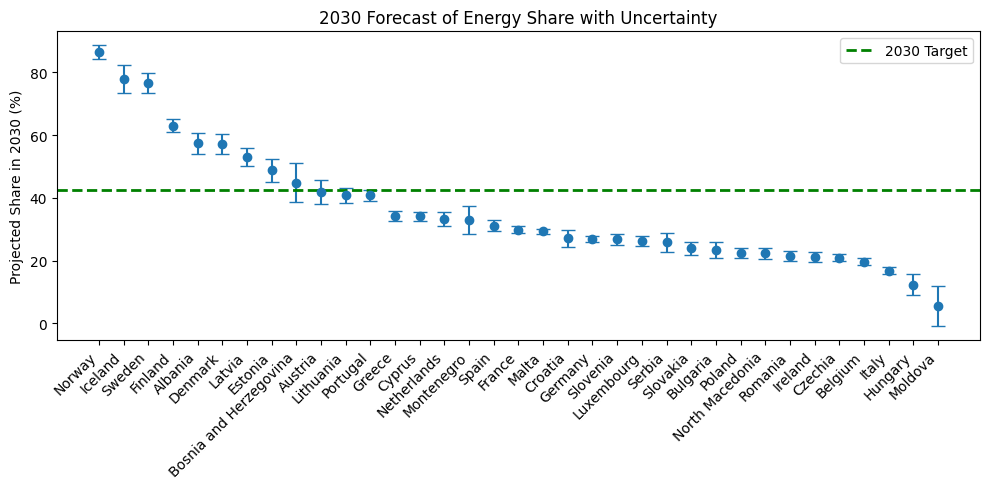

In [35]:
# Sort for readability
df_plot = final_report_sorted[
    final_report_sorted['Country'] != 'European Union - 27 countries (from 2020)'
].copy()

x = np.arange(len(df_plot))

plt.figure(figsize=(10, 5))

# Forecast points
plt.errorbar(
    x,
    df_plot['Forecast_2030_Base'],
    yerr=[
        df_plot['Forecast_2030_Base'] - df_plot['Forecast_2030_Low'],
        df_plot['Forecast_2030_High'] - df_plot['Forecast_2030_Base']
    ],
    fmt='o',
    capsize=5
)

# Target line
plt.axhline(
    y=target_2030,
    linestyle='--',
    linewidth=2,
    label='2030 Target', color = 'green'
)

# Labels
plt.xticks(x, df_plot['Country'], rotation=45, ha='right')
plt.ylabel('Projected Share in 2030 (%)')
plt.title('2030 Forecast of Energy Share with Uncertainty')

plt.legend()
plt.tight_layout()
plt.show()


### Analysis of Renewable Energy Share Forecasts to 2030

The table summarizes country-level forecasts of renewable energy shares in gross final energy consumption for 2030, alongside model accuracy and an assessment of whether countries appear to be on track. Overall, the results highlight substantial heterogeneity across Europe in both current renewable penetration and projected progress.

Countries with already high renewable shares—such as **Norway, Iceland, Sweden, and Finland** —are projected to further strengthen their positions by 2030 and are consistently classified as on track. These countries combine strong historical trends with relatively low forecast uncertainty, as reflected by modest RMSE values, lending confidence to their projected trajectories.

A second group of countries, including **Denmark, Albania, Latvia, and Estonia**, also appears on track despite starting from lower baselines. Their forecasts suggest sustained growth that would allow them to reach or exceed commonly cited 2030 benchmarks, indicating effective momentum in renewable deployment.

In contrast, the majority of countries—including large energy consumers such as **Germany, France, Italy, Spain, and Poland**, as well as the EU-27 aggregate—are classified as not on track. While these countries show continued increases in renewable share, the projected levels for 2030 remain below target thresholds, suggesting that current rates of growth may be insufficient without additional policy intervention.

Forecast uncertainty varies considerably across countries. In most cases, the confidence intervals remain relatively narrow, supporting the robustness of the projections. However, countries such as Bosnia and Herzegovina and Moldova exhibit higher errors and wider uncertainty ranges, due to missing data, indicating greater forecast risk.